<a href="https://colab.research.google.com/github/Raisler/DataScience_Portfolio/blob/master/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start
* Follow this tutorial to take kaggle dataset to colab: https://www.kaggle.com/general/74235 
* Dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
!pip install -q kaggle

In [ ]:
 from google.colab import files
 files.upload()

In [3]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

In [ ]:
!unzip /content/creditcardfraud.zip -d creditcardfraud

![alt text](https://www.credilink.com.br/wp-content/uploads/2016/07/fraudes-cartoes-credito-loja-virtual.gif)

# About

* The datasets contains transactions made by credit cards in September 2013 by european cardholders.

* This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

* For more information, go to the dataset page in kaggle.

# Objective

Identify fraudulent credit card transactions.

# EDA

In [7]:
path = '/content/creditcardfraud/creditcard.csv'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

> No null values, now go to see the data

In [8]:
display(df.head(3), df.shape)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


(284807, 31)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


0    284315
1       492
Name: Class, dtype: int64

*-*-*-*-*-*-*-*-*-*-


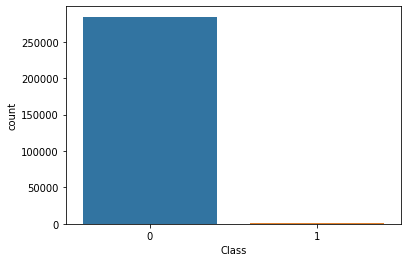

In [10]:
display(df['Class'].value_counts())
print('*-'*10)
display(sns.countplot(x = df['Class']))

# Preprocessing Data
What is need:

* Drop column Time (It's not important to our model for while)
* Normalize Amount and the principal components
* Fix imbalance target
* Split train/test


In [42]:
! pip install imbalanced-learn

In [43]:
# imports 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [44]:
df.drop(columns = ['Time'], inplace = True)

KeyError: ignored

In [47]:
features = np.array(df.drop(columns = ['Class']))
target = np.array(df['Class'])
display(features, target)

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
# Scaler

scale = StandardScaler().fit(features)
features = scale.transform(features)
features

array([[-0.69424232, -0.04407492,  1.6727735 , ...,  0.33089162,
        -0.06378115,  0.24496426],
       [ 0.60849633,  0.16117592,  0.1097971 , ..., -0.02225568,
         0.04460752, -0.34247454],
       [-0.69350046, -0.81157783,  1.16946849, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 0.98002374, -0.18243372, -2.14320514, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [-0.12275539,  0.32125034,  0.46332013, ...,  0.26960398,
         0.31668678, -0.31324853],
       [-0.27233093, -0.11489898,  0.46386564, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
                                          features,target,
                                          test_size = 0.40, random_state = 42
                                          )

> To fix the imbalance target, there is two options, the OverSampler and the UnderSampler, the problem with the first one is that we already have a lot of data (284807 rows by 30 features), so, my approach is reduce my dataset.

In [50]:
undersample = RandomUnderSampler(sampling_strategy=0.25)
X_train, y_train = undersample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [51]:
print(Counter(y_train))

Counter({0: 1204, 1: 301})


In [ ]:
# undersample = RandomUnderSampler(sampling_strategy=0.85)
# X_test, y_test = undersample.fit_resample(X_test, y_test)
# print(Counter(y_test))

# Modelling



In [45]:
# Imports 
from sklearn.ensemble import RandomForestClassifier

In [46]:
clf = RandomForestClassifier(max_depth=2, random_state=42).fit(X_train, y_train)
clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

# Evaluate

In [52]:
# Imports 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [53]:
predicts = clf.predict(X_test)

In [54]:
score = accuracy_score(y_test, predicts)

In [55]:
score

0.9992626598667521

In [56]:
display(predicts[0:100], y_test.shape)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

(113923,)

In [57]:
Counter(predicts)

Counter({0: 113712, 1: 211})

### Predictions DataFrame

In [58]:
predictions_df = pd.DataFrame({'Values': y_test,'Prediction': predicts})
predictions_df

,Values,Prediction
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
113918,0,0
113919,0,0
113920,0,0
113921,0,0


In [64]:
scores = cross_val_score(clf, X_test, y_test, cv=10, scoring='accuracy')

In [65]:
scores.mean()

0.999087104848039

In [61]:
evaluate =  classification_report(y_test, predicts)
print('Classification metrics: \n', evaluate)

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113732
           1       0.75      0.83      0.79       191

    accuracy                           1.00    113923
   macro avg       0.88      0.92      0.90    113923
weighted avg       1.00      1.00      1.00    113923



> Given the class imbalance ratio, and for being a gret metric, I will measure the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [67]:
display(confusion_matrix(y_test, predicts))
display(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

array([[113680,     52],
       [    32,    159]])

0.9705185728256543

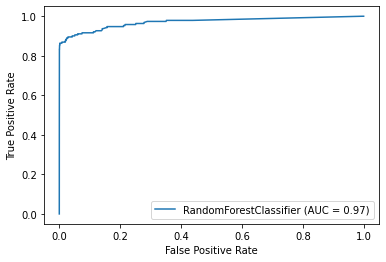

In [66]:
plot_roc_curve(clf, X_test, y_test)  
plt.show()     